In [1]:
from itertools import combinations
from functools import lru_cache

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt

from shapely.plotting import plot_polygon

In [2]:
data = open("input/09").read().splitlines()

In [3]:
def area(p1, p2):
    return (abs(p1[0] - p2[0]) + 1) * (abs(p1[1] - p2[1]) + 1)

In [4]:
red_tiles = []
for line in data:
    red_tiles.append(tuple(map(int, line.split(","))))

In [5]:
part1 = 0
for a, b in combinations(red_tiles, 2):
    part1 = max(part1, area(a, b))

In [6]:
print(f"Answer #1: {part1}")

Answer #1: 4761736832


# Part 2

In [7]:
polygon = Polygon([Point(a, b) for a, b in red_tiles])

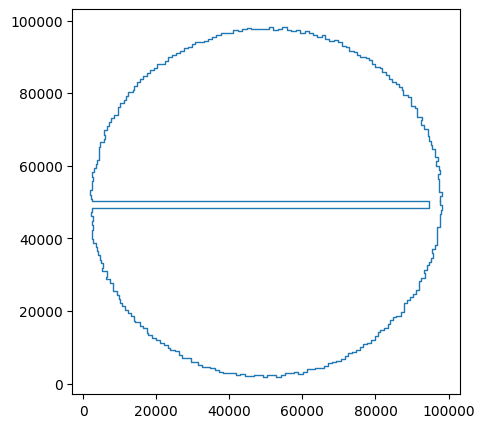

In [8]:
x, y = polygon.exterior.xy

plt.figure(figsize=(5,5))
plt.plot(x, y, linewidth=1)
plt.show()

In [9]:
# My solution was really time consuming, I wanted to brute force the solution but checked to many points
# Someone suggested reducing the grid to something smaller, but instead I just ignore to check the rows/columns where no point is added

In [10]:
all_x_values = []
all_y_values = []
for x, y in red_tiles:
    all_x_values.append(x)
    all_y_values.append(y)

ignore_x = set()
for x in range(min(all_x_values), max(all_x_values) + 1):
    if x not in all_x_values:
        ignore_x.add(x)

ignore_y = set()
for y in range(min(all_y_values), max(all_y_values) + 1):
    if y not in all_y_values:
        ignore_y.add(y)

In [11]:
@lru_cache(maxsize=None)
def inside(point):
    return polygon.covers(Point(point[0], point[1]))

In [12]:
areas = []
for a, b in combinations(red_tiles, 2):
    areas.append((area(a, b), a, b))

In [13]:
areas.sort(reverse=True)

In [14]:
# Remove the ones that have invalid corners and then check if valid, i.e. not a point outside of the polygon

In [15]:
def check_valid(a, b):
    for x in range(min(a[0], b[0]), max(a[0], b[0]) + 1):
        if x in ignore_x:
            continue
        for y in range(min(a[1], b[1]), max(a[1], b[1]) + 1):
            if y in ignore_y:
                continue
            if not inside((x, y)):
                return False
    return True

In [16]:
def get_corners(a, b):
    return [(a[0], a[1]), (a[0], b[1]), (b[0], a[1]), (b[0], b[1])]

In [17]:
for part2, a, b in areas:
    for corner in get_corners(a, b):
        if not inside(corner):
            break
    else:
        if check_valid(a, b):
            break

In [18]:
print(f"Answer #2: {part2}")

Answer #2: 1452422268
